In [2]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.animation as anim
import numpy.random as rd
from jupyterthemes import jtplot

jtplot.style()
mp.rcParams["text.usetex"] = True
mp.rcParams["figure.figsize"] = (7,7)

In [24]:
class Ising:
    
    def __init__(self, L=20):
        rd.seed(314159)
        self.L = L
        self.s = np.ones((L,L), int)
        self.bf = np.zeros(3, float)
        
    def setT(self,t):
        temp = t
        self.bf[0] = 0.5*rd.random()
        self.bf[1] = np.exp(-4/temp)*rd.random()
        self.bf[2] = np.exp(-8/temp)*rd.random()
        
    def run(self):
        s,L = self.s, self.L
        for x in range(self.L-1):
            for y in range(self.L-1):
                e = s[x,y] * (s[x-1,y] + s[x+1,y] + s[x,y-1] + s[x,y+1])
                if e < 0 or rd.random() < self.bf[e//2]:
                    s[x,y] = -s[x,y]
                    v = 2*(x*80+2*(y-1)+2)
                    ch = (s[x,y] + 1)*15
                    
        for x in range(L-2):
            s[0,x] = s[L-2,x]
            s[L-1,x] = s[1,x]
            s[x,0] = s[x,L-2]
            s[x,L-1] = s[x,1]
            
        self.s = s

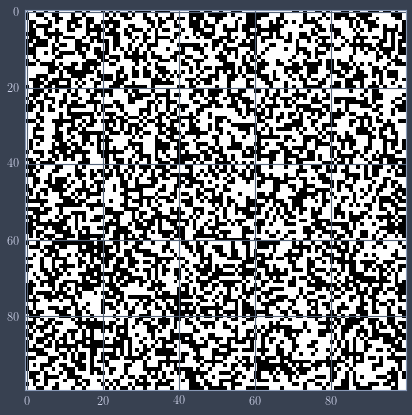

In [31]:
sim = Ising(100)
sim.setT(1000)
sim.run()
mp.imshow(sim.s, cmap="gray")
mp.show()